 # Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

 # Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

# Data Dictionary

 - Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
 - Company: Name of the company
 - GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
 - GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
 - Current Price: Current stock price in dollars
 - Price Change: Percentage change in the stock price in 13 weeks
 - Volatility: Standard deviation of the stock price over the past 13 weeks
 - ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
 - Cash Ratio: The ratio of a company's total reserves of cash and cash equivalents to its total current liabilities
 - Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
 - Net Income: Revenues minus expenses, interest, and taxes (in dollars)
 - Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
 - Estimated Shares Outstanding: Company's stock currently held by all its shareholders
 - P/E Ratio: Ratio of the company's current stock price to the earnings per share
 - P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

# Importing Libraries and Data

In [6]:
# making code more structured
%load_ext nb_black

# for dataframes and math
import numpy as np
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

import os

%matplotlib inline

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform k-means clustering
from sklearn.cluster import KMeans

# to compute distances
from scipy.spatial.distance import cdist

# to compute silouette scores
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
from scipy.spatial.distance import pdist

<IPython.core.display.Javascript object>

In [3]:
# changing directory
os.chdir('D://Python')

In [5]:
# checking directory
os.getcwd()

'D:\\Python'

In [7]:
# reading data
stock_data = pd.read_csv("stock_data.csv")

<IPython.core.display.Javascript object>

In [17]:
# checking shape of dframe
stock_data.shape

(340, 15)

<IPython.core.display.Javascript object>

In [9]:
# viewing head of dframe
stock_data.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


<IPython.core.display.Javascript object>

In [11]:
# viewing tail of dframe
stock_data.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


<IPython.core.display.Javascript object>

In [12]:
# viewing random sample
stock_data.sample(n=25, random_state=1)

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
102,DVN,Devon Energy Corp.,Energy,Oil & Gas Exploration & Production,32.000000,-15.478079,2.923698,205,70,830000000,-14454000000,-35.550,4.065823e+08,93.089287,1.785616
125,FB,Facebook,Information Technology,Internet Software & Services,104.660004,16.224320,1.320606,8,958,592000000,3669000000,1.310,2.800763e+09,79.893133,5.884467
11,AIV,Apartment Investment & Mgmt,Real Estate,REITs,40.029999,7.578608,1.163334,15,47,21818000,248710000,1.520,1.636250e+08,26.335526,-1.269332
248,PG,Procter & Gamble,Consumer Staples,Personal Products,79.410004,10.660538,0.806056,17,129,160383000,636056000,3.280,4.913916e+08,24.070121,-2.256747
238,OXY,Occidental Petroleum,Energy,Oil & Gas Exploration & Production,67.610001,0.865287,1.589520,32,64,-588000000,-7829000000,-10.230,7.652981e+08,93.089287,3.345102
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.970,4.353535e+08,17.682214,-3.838260
112,EQT,EQT Corporation,Energy,Oil & Gas Exploration & Production,52.130001,-21.253771,2.364883,2,201,523803000,85171000,0.560,1.520911e+08,93.089287,9.567952
147,HAL,Halliburton Co.,Energy,Oil & Gas Equipment & Services,34.040001,-5.101751,1.966062,4,189,7786000000,-671000000,-0.790,8.493671e+08,93.089287,17.345857
89,DFS,Discover Financial Services,Financials,Consumer Finance,53.619999,3.653584,1.159897,20,99,2288000000,2297000000,5.140,4.468872e+08,10.431906,-0.375934
173,IVZ,Invesco Ltd.,Financials,Asset Management & Custody Banks,33.480000,7.067477,1.580839,12,67,412000000,968100000,2.260,4.283628e+08,14.814159,4.218620


<IPython.core.display.Javascript object>

In [13]:
# checking data types
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

<IPython.core.display.Javascript object>

In [14]:
# checking for duplicates
stock_data.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [15]:
# checking for null values
stock_data.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:

 - No duplicate rows
 - No null values
 - 340 rows (stocks) and 15 columns (features) per stock
 - 4 object dypes, may drop some in our EDA

# Exploratory Data Analysis (EDA) and Preprocessing

In [16]:
# creating copy of data before performing EDA
data = stock_data.copy()

<IPython.core.display.Javascript object>

In [19]:
# creating dframe with our object dtypes
cat_columns = data.describe(include="object").columns
cat_columns

Index(['Ticker Symbol', 'Security', 'GICS Sector', 'GICS Sub Industry'], dtype='object')

<IPython.core.display.Javascript object>

In [20]:
# checking the unique values in each categorical column
for i in cat_columns:
    print("Unique values in", i, "are:")
    print(data[i].value_counts())
    print("*" * 50)

Unique values in Ticker Symbol are:
MAR     1
IPG     1
BAC     1
INTC    1
CHTR    1
       ..
FAST    1
EXC     1
IRM     1
EBAY    1
KSU     1
Name: Ticker Symbol, Length: 340, dtype: int64
**************************************************
Unique values in Security are:
Fastenal Co             1
Sherwin-Williams        1
Unum Group              1
Arconic Inc             1
McDonald's Corp.        1
                       ..
Bristol-Myers Squibb    1
Kansas City Southern    1
BB&T Corporation        1
FLIR Systems            1
S&P Global, Inc.        1
Name: Security, Length: 340, dtype: int64
**************************************************
Unique values in GICS Sector are:
Industrials                    53
Financials                     49
Consumer Discretionary         40
Health Care                    40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consum

<IPython.core.display.Javascript object>

Because Ticker Symbol and Security have the same meaning, we will drop the Ticker Symbol. We can also drop GICS Sub Industry since we have multiple records with only one occurrence. We can use the GICS Sector for the purpose of labelling industry types.

In [21]:
# dropping Ticker Symbol and GICS Sub Industry
data.drop(["Ticker Symbol", "GICS Sub Industry"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [23]:
# checking columns
data.columns

Index(['Security', 'GICS Sector', 'Current Price', 'Price Change',
       'Volatility', 'ROE', 'Cash Ratio', 'Net Cash Flow', 'Net Income',
       'Earnings Per Share', 'Estimated Shares Outstanding', 'P/E Ratio',
       'P/B Ratio'],
      dtype='object')

<IPython.core.display.Javascript object>

## Univariate Analysis

### Numerical Data

In [25]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

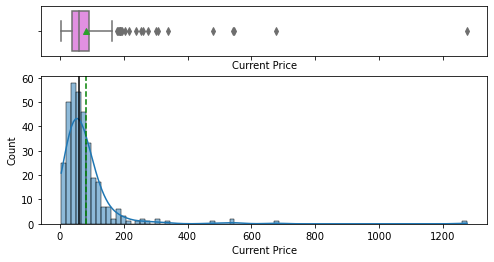

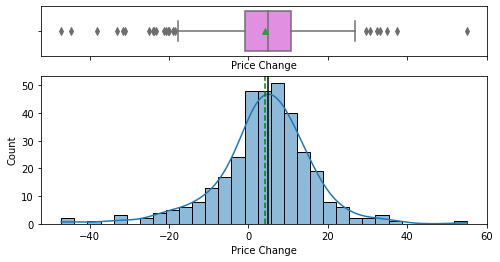

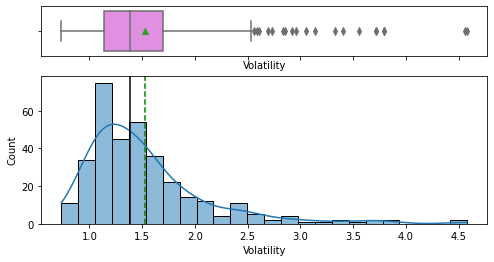

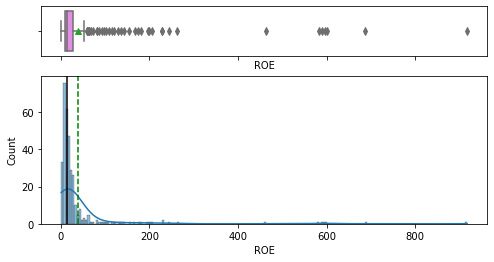

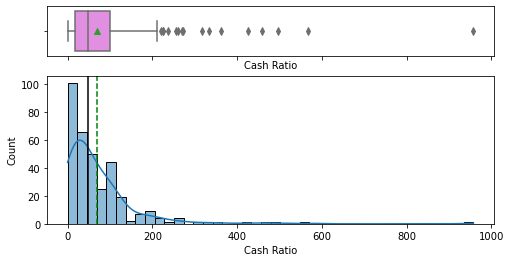

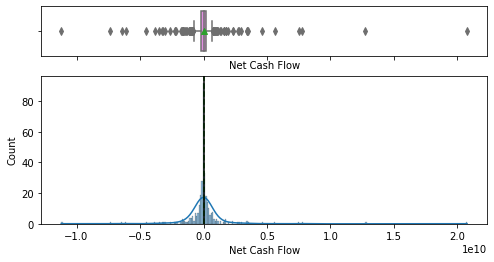

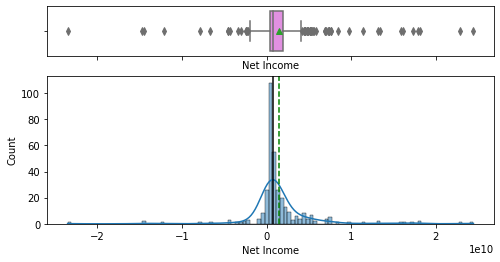

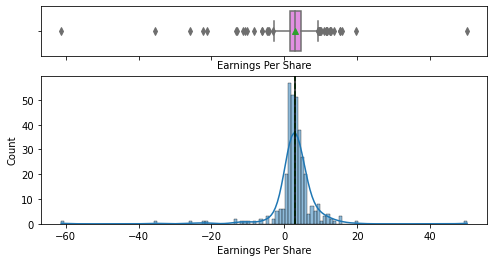

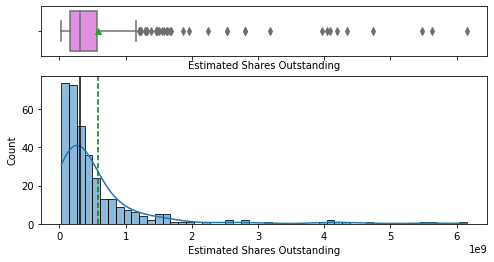

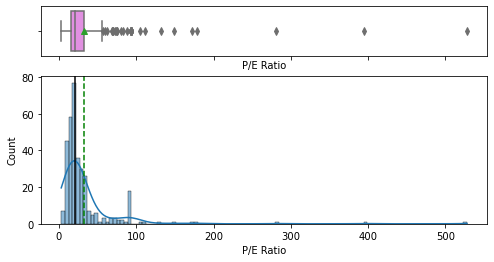

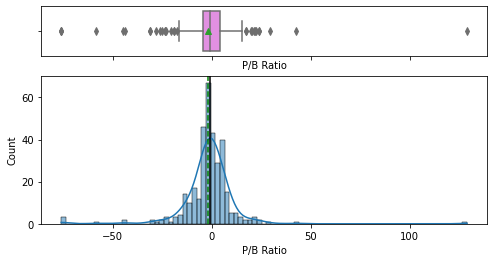

<IPython.core.display.Javascript object>

In [27]:
# selecting numerical columns
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item, kde=True, figsize=(8, 4))

#### Observations:

 - Current Price is skewed to the right with a median of about 60 and a mean of about 70
 - Price Change has a median and mean of about 4 and is fairly normally distributed
 - Volatility is skewed to the right and has a median of 1.4 and mean of 1.5
 - ROE is skewed to the right with median close to 10 and mean close to 20
 - Cash Ratio is skewed to the right with median close to 40 and mean close to 60
 - Net Cash Flow is fairly normally distributed with both mean and median centered close to 0
 - Net Income is fairly normally distributed with both mean and median centered just above 0
 - Earnings Per Share is fairly normally distributed with both mean and median centerd around 2
 - Estimated Shares Outstanding is skewed to the right with a median of about .3 and a mean of about .6
 - P/E Ratio is skewed to the right with a median around 20 and a mean around 35
 - P/B Ratio is fairly normally distributed with mean and median centered around 0

### Categorical Data

In [28]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

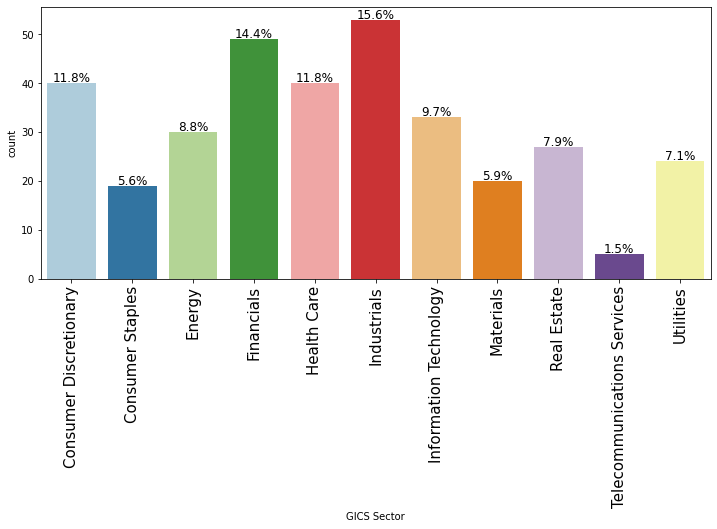

<IPython.core.display.Javascript object>

In [30]:
# viewing GICS Sector
labeled_barplot(data, "GICS Sector", perc=True)

## Bivariate Analysis

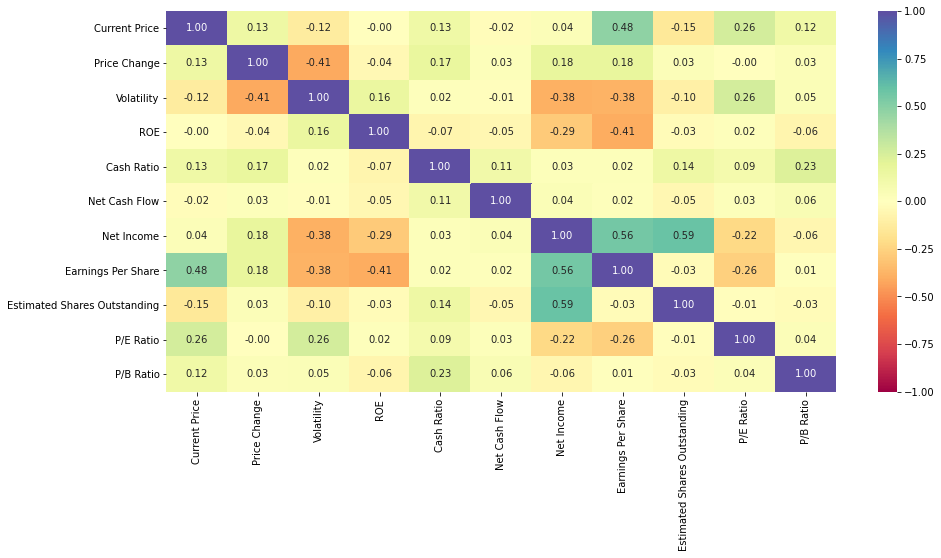

<IPython.core.display.Javascript object>

In [31]:
# using heatmap to check for correlations
plt.figure(figsize=(15, 7))
sns.heatmap(
    data[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

There doesn't seem to be many strong correlations amongst our metrics.

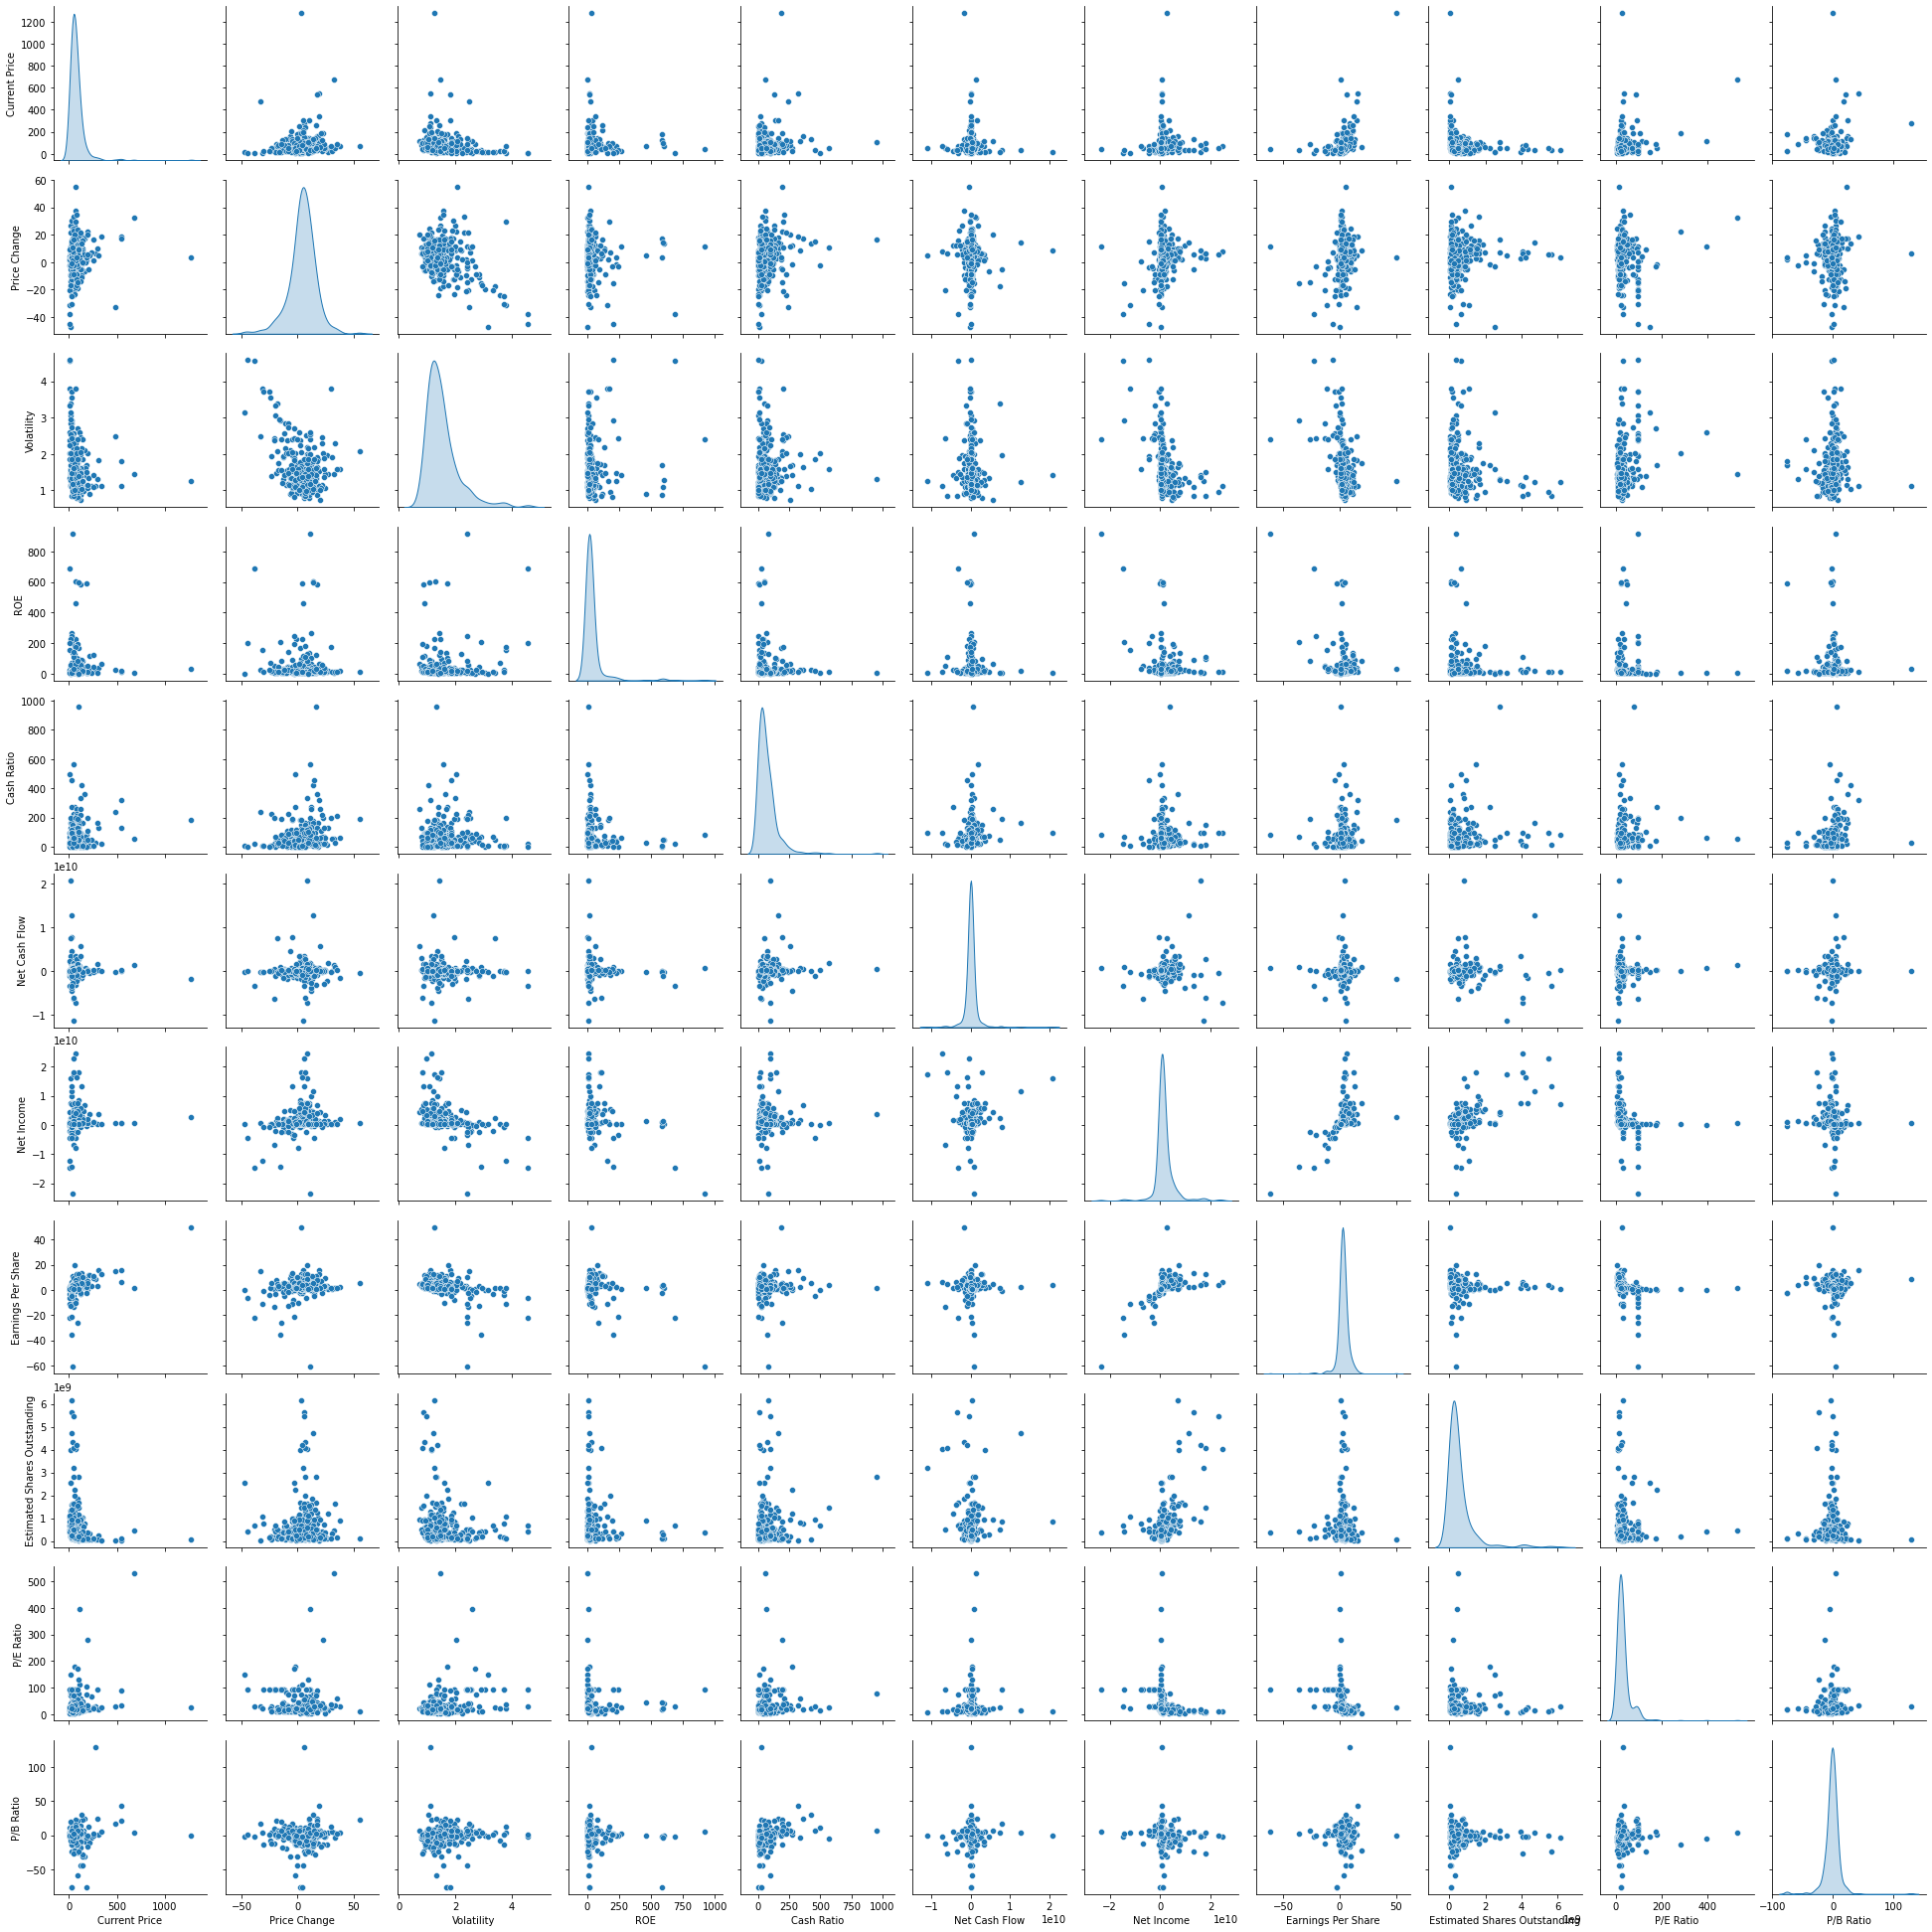

<IPython.core.display.Javascript object>

In [33]:
# using pairplot to view correlations
sns.pairplot(data=data[num_col], diag_kind="kde")
plt.show()

#### Observations:

 - Almost normally distributions for Price Change, Net Cash Flow, Net Income, Earnings Per Share and P/B Ratio
 - Right skewed data for other features
 - Biomodal distribution for P/E Raio

## Outlier Detection and Treatment

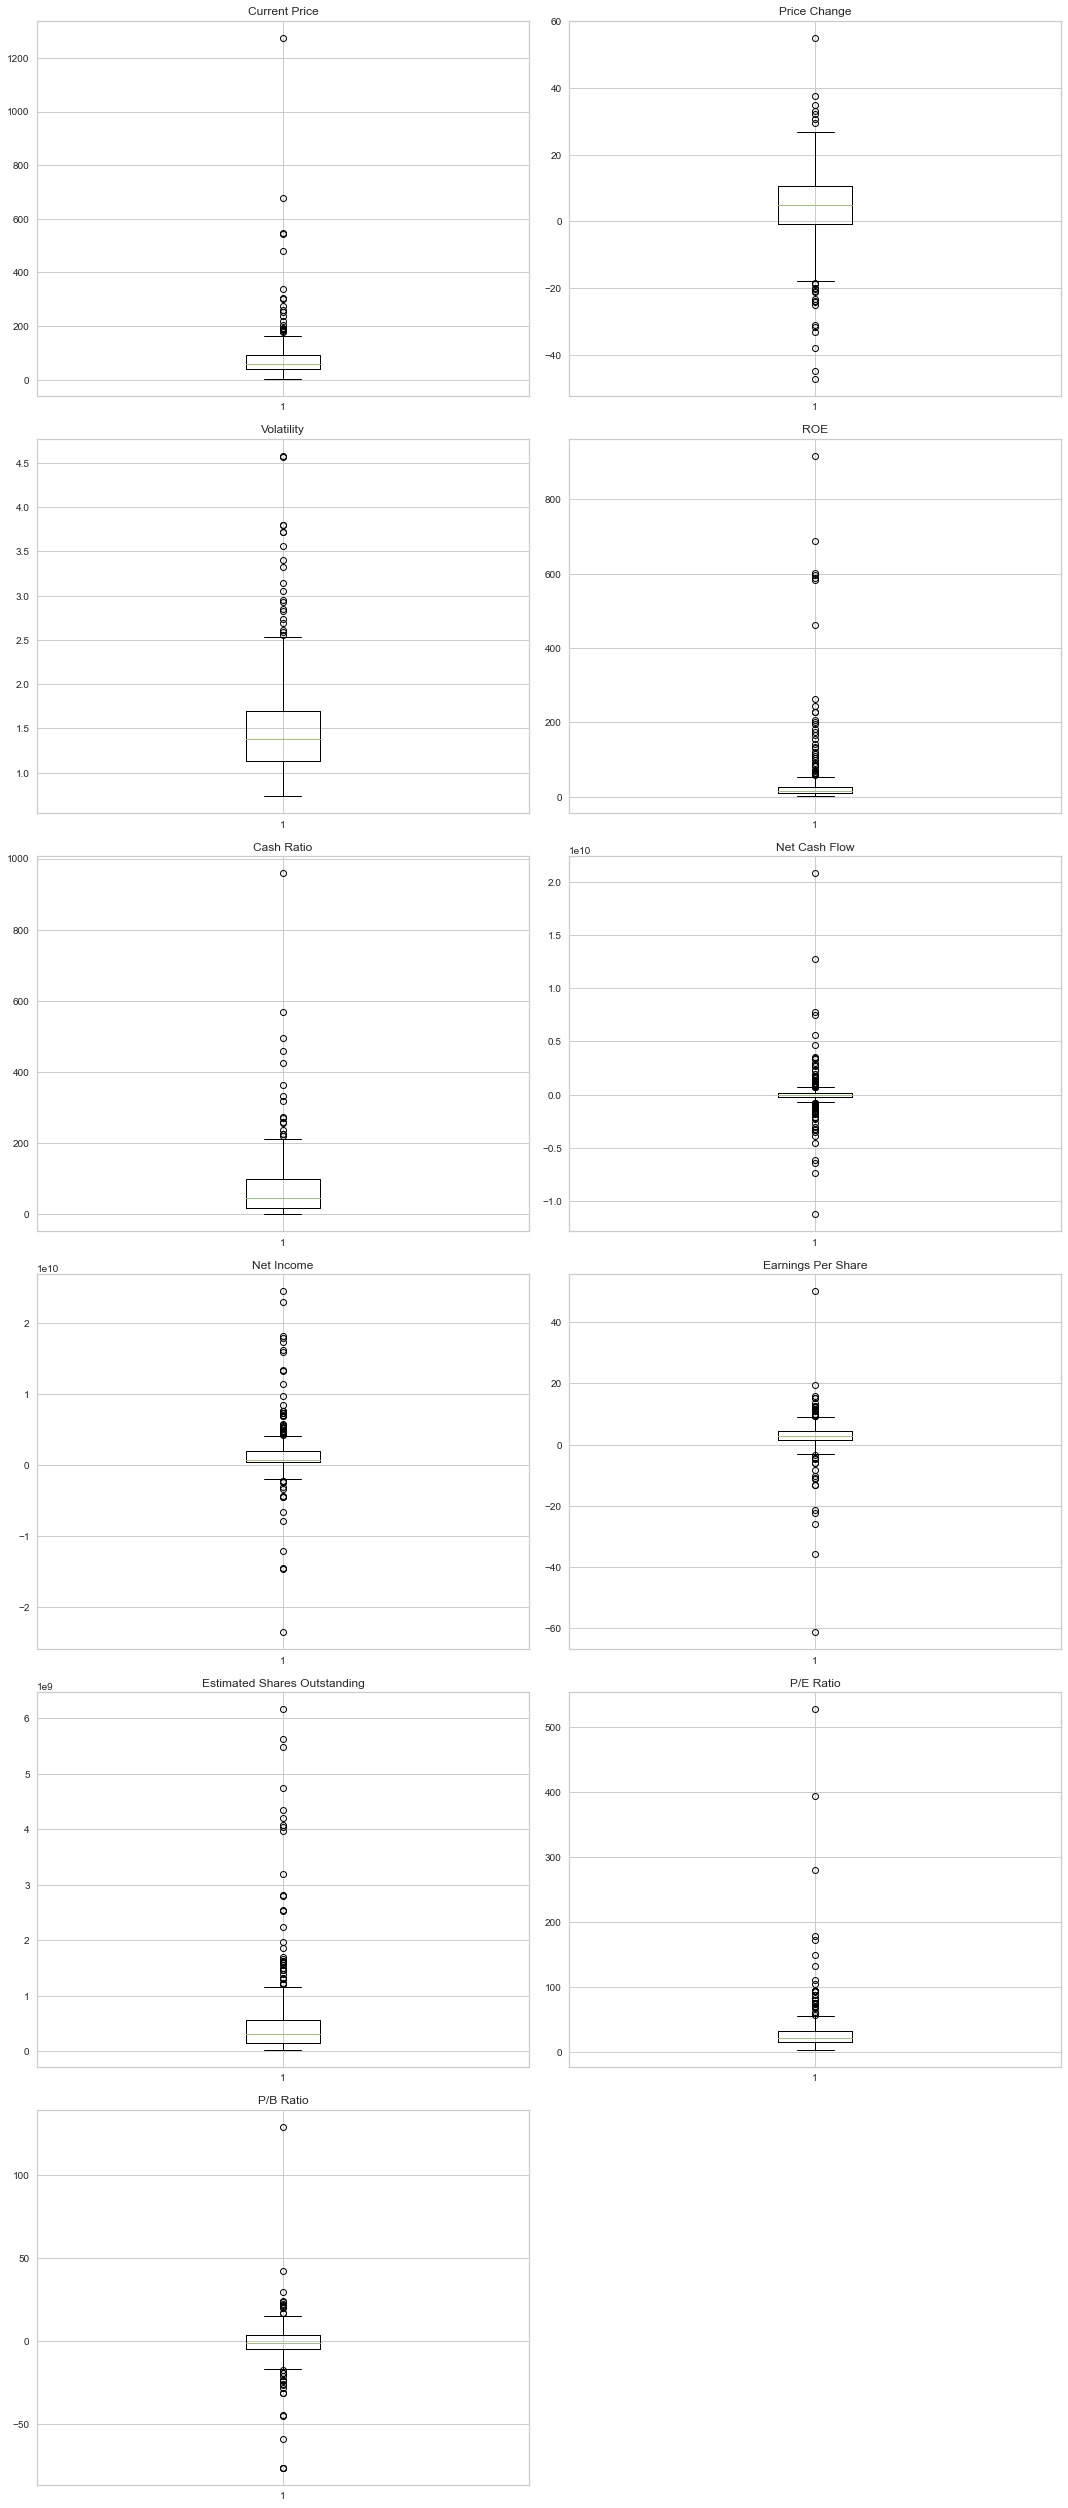

<IPython.core.display.Javascript object>

In [49]:
# plotting numeric columns using boxplot
plt.figure(figsize=(15, 35))

for i, variable in enumerate(num_col):
    plt.subplot(6, 2, i + 1)  # subplot(nrows, ncols, index, **kwargs)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

In [50]:
# functions to treat outliers by flooring and capping


def treat_outliers(df, col):
    """
    Treats outliers in a variable

    df: dataframe
    col: dataframe column
    """
    Q1 = df[col].quantile(0.25)  # 25th quantile
    Q3 = df[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)

    return df


def treat_outliers_all(df, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        df = treat_outliers(df, c)

    return df

<IPython.core.display.Javascript object>

In [51]:
# flooring and capping our outliers
treat_out_cols = [
    "Current Price",
    "Price Change",
    "Volatility",
    "ROE",
    "Cash Ratio",
    "Net Cash Flow",
    "Net Income",
    "Earnings Per Share",
    "Estimated Shares Outstanding",
    "P/E Ratio",
    "P/B Ratio",
]

df = treat_outliers_all(data, treat_out_cols)

<IPython.core.display.Javascript object>

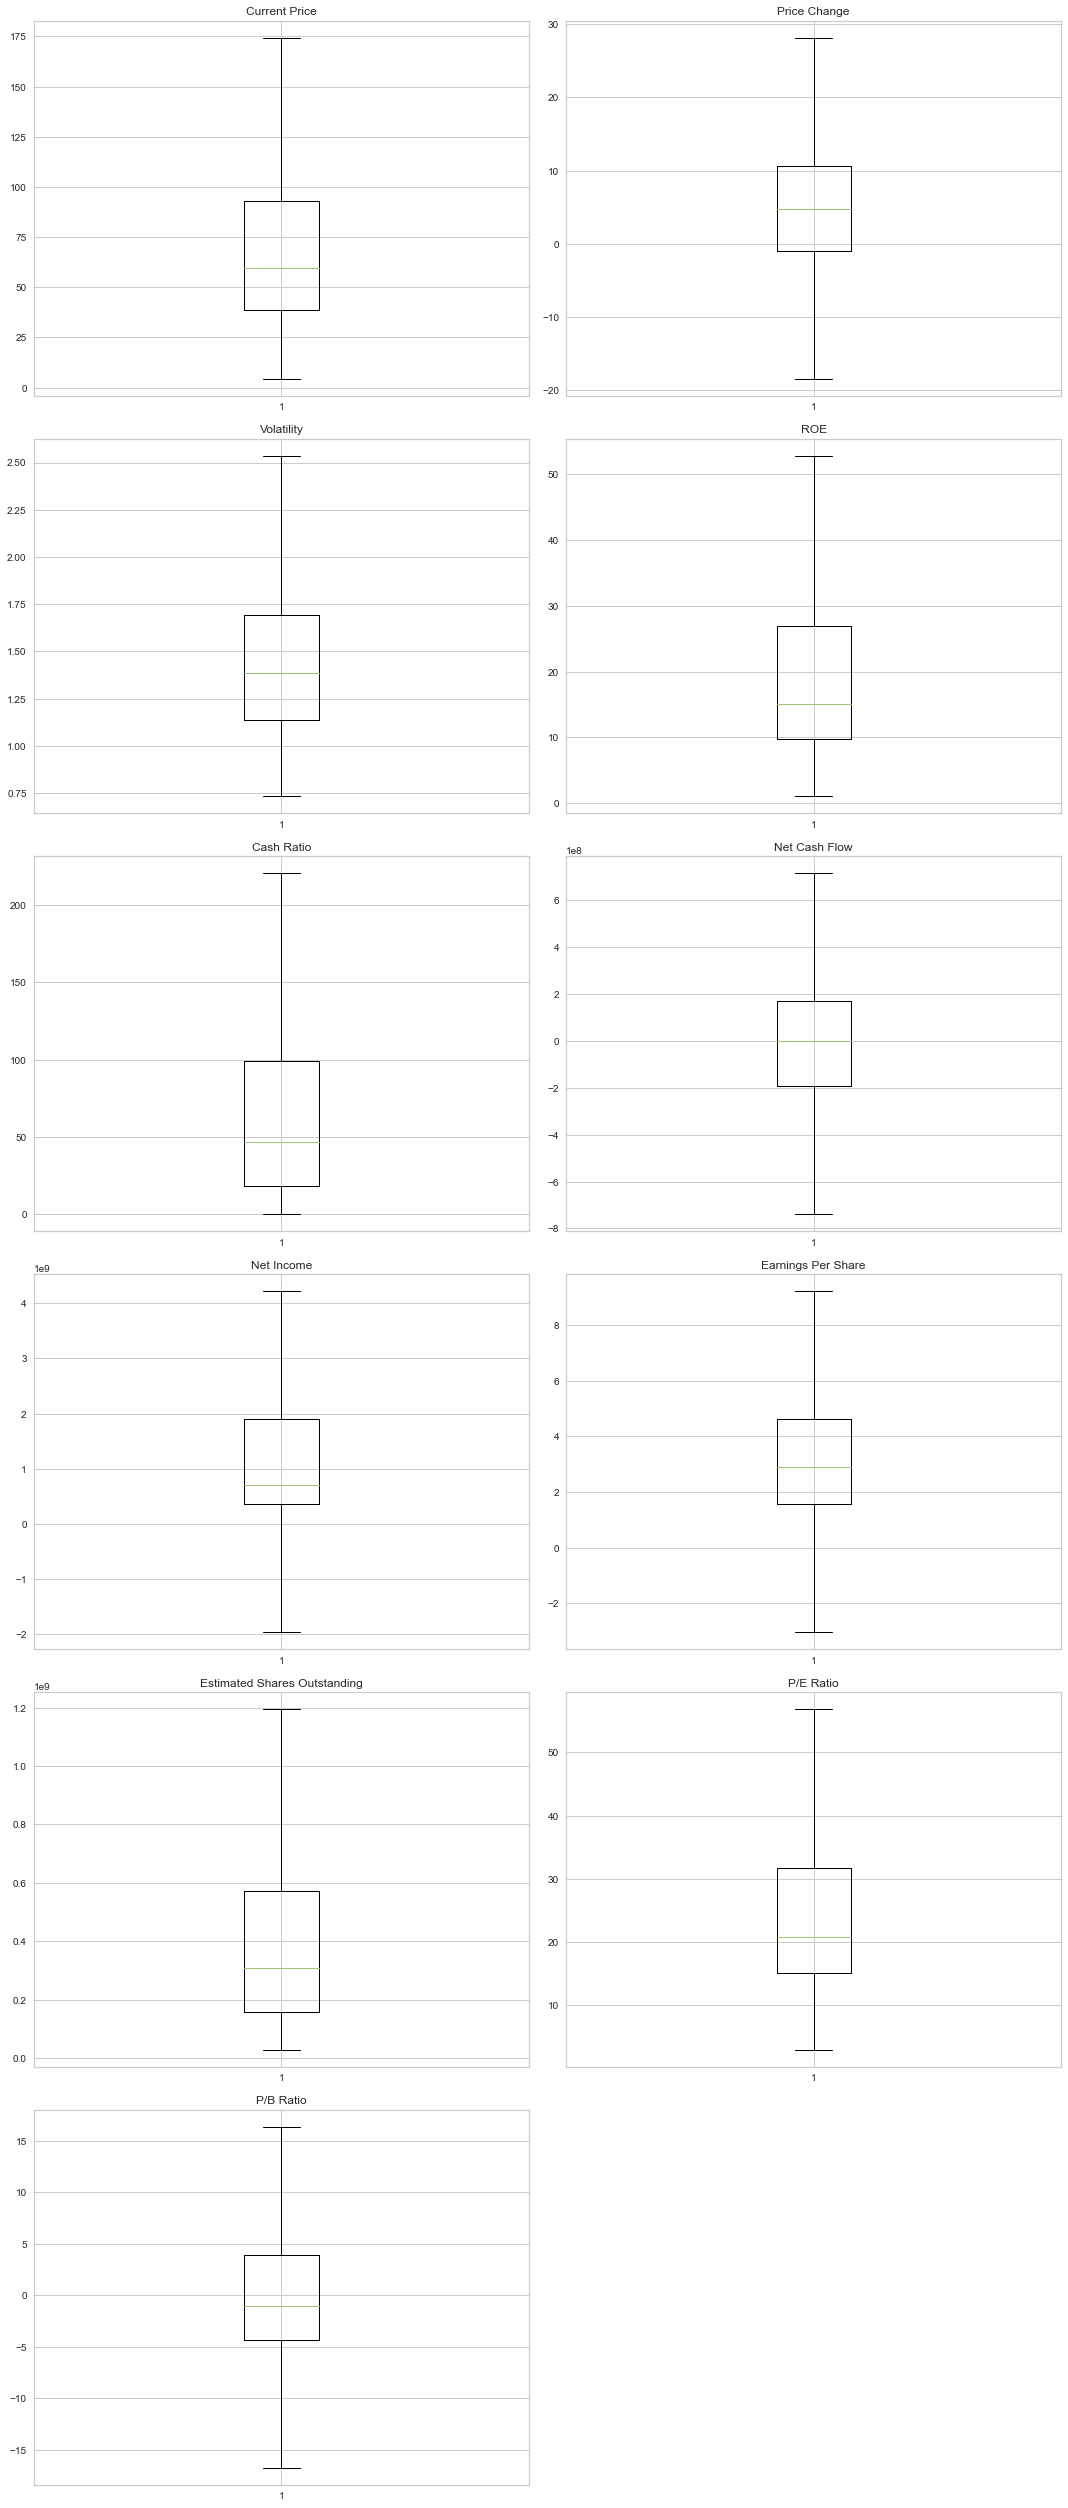

<IPython.core.display.Javascript object>

In [52]:
# viewing boxplot again to see if outliers were treated
# plotting numeric columns using boxplot
plt.figure(figsize=(15, 35))

for i, variable in enumerate(num_col):
    plt.subplot(6, 2, i + 1)  # subplot(nrows, ncols, index, **kwargs)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)
plt.show()

Outliers were successfully treated so we now will scale the data with our df dframe.

# KMeans Clustering

In [53]:
# scaling data with zscore
# from sklearn.preprocessing import StandardScaler

# making another copy of data and scaling data
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

<IPython.core.display.Javascript object>

In [54]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

<IPython.core.display.Javascript object>

In [40]:
# to perform k-means clustering
# from sklearn.cluster import KMeans

# to compute distances
#from scipy.spatial.distance import cdist

# to compute silouette scores
#from sklearn.metrics import silhouette_score

<IPython.core.display.Javascript object>

Number of Clusters: 1 	Average Distortion: 3.1482665386211908
Number of Clusters: 2 	Average Distortion: 2.95133394846628
Number of Clusters: 3 	Average Distortion: 2.7589092675268265
Number of Clusters: 4 	Average Distortion: 2.6333554308572875
Number of Clusters: 5 	Average Distortion: 2.536091952682437
Number of Clusters: 6 	Average Distortion: 2.4559862198432283
Number of Clusters: 7 	Average Distortion: 2.4173849681821475
Number of Clusters: 8 	Average Distortion: 2.3386092830865746


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

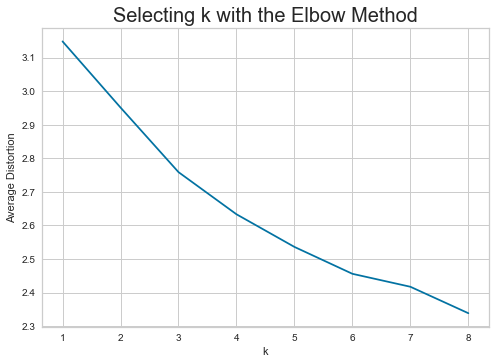

<IPython.core.display.Javascript object>

In [55]:
# calculating average distortion and plotting clusters 1-8
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)

The elbow method method gives an optimum value of k between 3 and 7.

For n_clusters = 2, silhouette score is 0.15112404547455113
For n_clusters = 3, silhouette score is 0.18108067893387209
For n_clusters = 4, silhouette score is 0.171061924712066
For n_clusters = 5, silhouette score is 0.14604885995441316
For n_clusters = 6, silhouette score is 0.14264722585237555
For n_clusters = 7, silhouette score is 0.1461959993216528
For n_clusters = 8, silhouette score is 0.13192626756237474
For n_clusters = 9, silhouette score is 0.12382704472134755


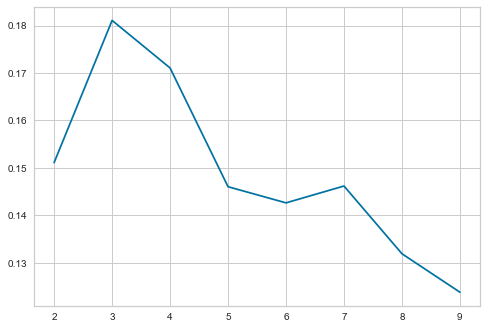

<IPython.core.display.Javascript object>

In [56]:
# checking silouette scores
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

The silhouette score shows the optimal value of k as 3.

In [44]:
!pip install yellowbrick

<IPython.core.display.Javascript object>

In [45]:
# to visualize the elbow curve and silhouette scores
#from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

<IPython.core.display.Javascript object>

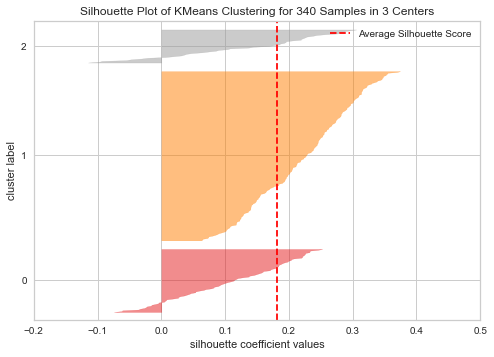

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [57]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

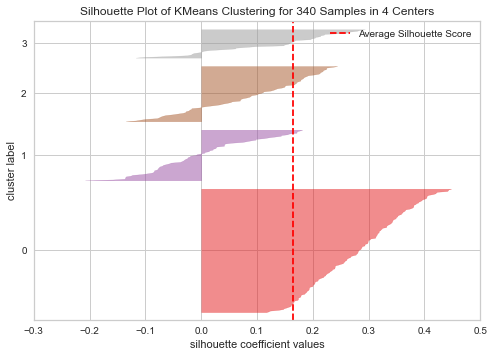

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [58]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

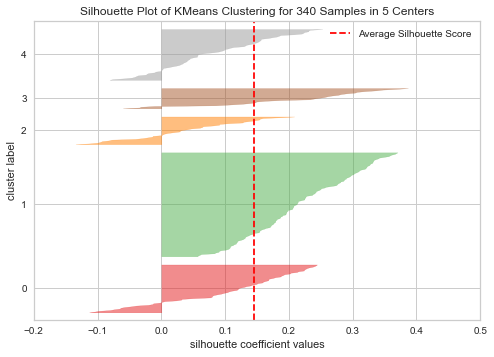

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [59]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

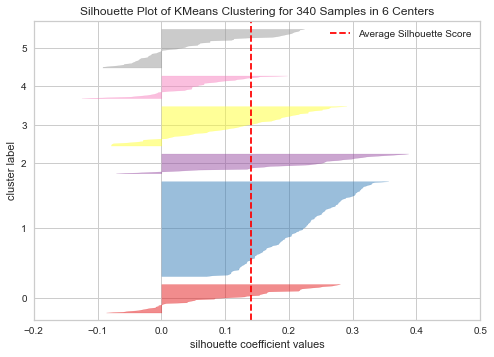

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [61]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

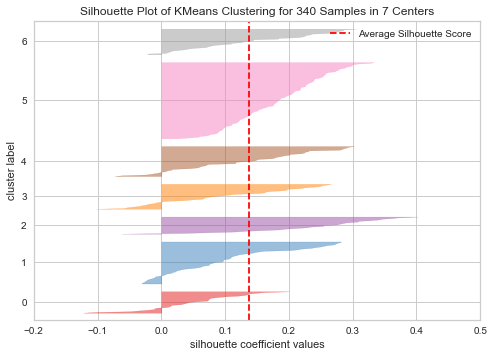

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

<IPython.core.display.Javascript object>

In [62]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

The Silhouette Visualizer shows the highest avg silhouette score of the k = 3 - 7 clusters as being 3. This is consistent with the line graph above so we will using k = 3.

In [64]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=3, random_state=1)

<IPython.core.display.Javascript object>

In [94]:
# making copy of df
df_km = df.copy()

# adding kmeans cluster labels to the original dataframe
df_km["K_means_segments"] = kmeans.labels_

<IPython.core.display.Javascript object>

In [95]:
df_km

,Security,GICS Sector,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,K_means_segments
0,American Airlines Group,Industrials,42.349998,9.999995,1.687151,52.875,51.0,-604000000,4219048125,9.21375,6.681299e+08,3.718174,-8.784219,0
1,AbbVie,Health Care,59.240002,8.339433,2.197887,52.875,77.0,51000000,4219048125,3.15000,1.194521e+09,18.806350,-8.750068,0
2,Abbott Laboratories,Health Care,44.910000,11.301121,1.273646,21.000,67.0,715386625,4219048125,2.94000,1.194521e+09,15.275510,-0.394171,0
3,Adobe Systems Inc,Information Technology,93.940002,13.977195,1.357679,9.000,180.0,-240840000,629551000,1.26000,4.996437e+08,56.844909,4.199651,1
4,"Analog Devices, Inc.",Information Technology,55.320000,-1.827858,1.701169,14.000,220.5,315120000,696878000,0.31000,1.194521e+09,56.844909,1.059810,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Yahoo Inc.,Information Technology,33.259998,14.887727,1.845149,15.000,220.5,-739482375,-1967746875,-3.03625,9.394573e+08,28.976191,6.261775,2
336,Yum! Brands Inc,Consumer Discretionary,52.516175,-8.698917,1.478877,52.875,27.0,159000000,1293000000,2.97000,4.353535e+08,17.682214,-3.838260,1
337,Zimmer Biomet Holdings,Health Care,102.589996,9.347683,1.404206,1.000,100.0,376000000,147000000,0.78000,1.884615e+08,56.844909,-16.755740,1
338,Zions Bancorp,Financials,27.299999,-1.158588,1.468176,4.000,99.0,-43623000,309471000,1.20000,2.578925e+08,22.749999,-0.063096,1


<IPython.core.display.Javascript object>

In [97]:
cluster_profile_km = df_km.groupby("K_means_segments").mean()
cluster_profile_km

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
K_means_segments,,,,,,,,,,,
0,72.060189,7.778991,1.316451,24.114198,72.870370,4.250431e+07,3.381669e+09,4.679522,8.951829e+08,18.463929,-1.422011
1,75.974806,5.046375,1.388462,18.602431,56.342593,-1.872788e+07,7.392462e+08,3.322668,2.511433e+08,24.383303,-1.892931
2,38.743228,-5.624054,2.270635,23.366279,78.546512,-2.239941e+07,-6.139228e+08,-1.009680,5.206778e+08,44.880598,2.536273


<IPython.core.display.Javascript object>

In [98]:
cluster_profile_km["count_in_each_segment"] = (
    df_km.groupby("K_means_segments")["Current Price"].count().values
)
cluster_profile_km

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.060189,7.778991,1.316451,24.114198,72.870370,4.250431e+07,3.381669e+09,4.679522,8.951829e+08,18.463929,-1.422011,81
1,75.974806,5.046375,1.388462,18.602431,56.342593,-1.872788e+07,7.392462e+08,3.322668,2.511433e+08,24.383303,-1.892931,216
2,38.743228,-5.624054,2.270635,23.366279,78.546512,-2.239941e+07,-6.139228e+08,-1.009680,5.206778e+08,44.880598,2.536273,43


<IPython.core.display.Javascript object>

In [99]:
# displaying cluster profiles
cluster_profile_km.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
K_means_segments,,,,,,,,,,,,
0,72.060189,7.778991,1.316451,24.114198,72.870370,42504310.185185,3381668570.987654,4.679522,895182890.327623,18.463929,-1.422011,81
1,75.974806,5.046375,1.388462,18.602431,56.342593,-18727880.208333,739246236.111111,3.322668,251143254.652280,24.383303,-1.892931,216
2,38.743228,-5.624054,2.270635,23.366279,78.546512,-22399406.976744,-613922793.604651,-1.009680,520677832.549477,44.880598,2.536273,43


<IPython.core.display.Javascript object>

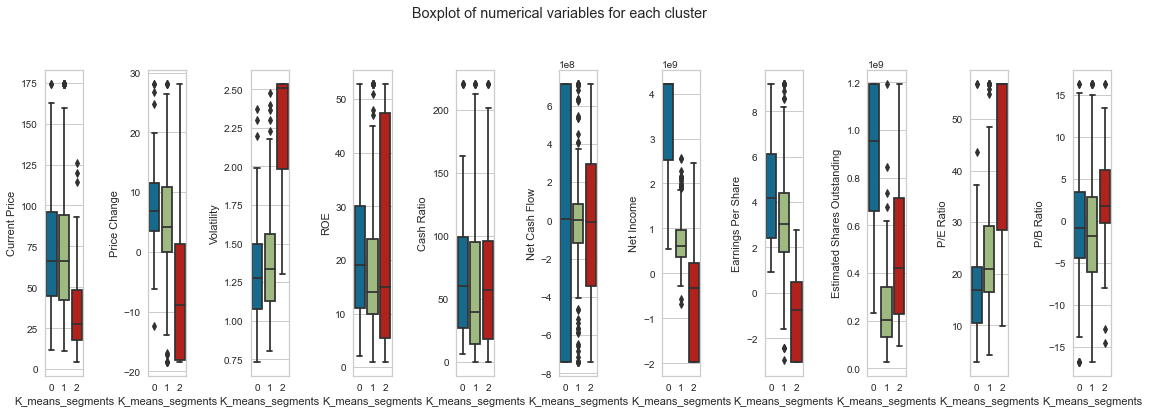

<IPython.core.display.Javascript object>

In [118]:
fig, axes = plt.subplots(1, 11, figsize=(16, 6))
fig.suptitle("Boxplot of numerical variables for each cluster")
counter = 0
for ii in range(11):
    sns.boxplot(ax=axes[ii], y=df_km[num_col[counter]], x=df_km["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

#### Observations:

 - Cluster 0:
     - Price Change is highest in the last thirteen weeks for this cluster at an average of 7.78.
     - This cluster also has the lowest volatility and highest ROE, which makes this the most safe cluster for investors in the last thirteen weeks.
     - The Earnings Per Share is highest in this cluster and seems to have the most investors as well.
     - This cluster has the lowest P/E Ratio, which means the investor pays the least for each dollar they earn.
     
 - Cluster 1:
     - This cluster has similar Volatility as Cluster 0 which means it is fairly safe to assume short term trends.
     - This cluster has the most stocks in it.
     - This cluster has a ROE of 18.60 compared to Cluster 0 which has a ROE of 24.11.
     - This cluster has the the highest Current Price but that does not mean it is the best investment cluster since the price changes by the minute in the NYSE.
     
 - Cluster 2:
     - Overall this seems to be the worst and most risky cluster.
     - The Volatility is the highest and the P/E Ratio as well.
     - This cluster does seem to keep a good amount of cash on hand as the Cash Ratio is the highest for this cluster.

# Hierarchical Clustering

In [78]:
# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
# from sklearn.cluster import AgglomerativeClustering
# from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to compute distances
#from scipy.spatial.distance import pdist

<IPython.core.display.Javascript object>

In [79]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.6932108674136775.
Cophenetic correlation for Euclidean distance and complete linkage is 0.6147798823663769.
Cophenetic correlation for Euclidean distance and average linkage is 0.7325610568988988.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.6496438783746495.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7214024727237498.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.36805931247944257.
Cophenetic correlation for Chebyshev distance and average linkage is 0.7011385715318806.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.5032471223561586.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.6176064847170999.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.38543044504439716.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.6415876007925729.
Cophenetic 

<IPython.core.display.Javascript object>

The highest cophenetic correlation is 0.7325610568988988, which is obtained by Euclidean distance and the average linkage method.

In [80]:
# exploring different linkage methods with Euclidean only
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.6932108674136775.
Cophenetic correlation for complete linkage is 0.6147798823663769.
Cophenetic correlation for average linkage is 0.7325610568988988.
Cophenetic correlation for centroid linkage is 0.7294329307928588.
Cophenetic correlation for ward linkage is 0.5753306117577638.
Cophenetic correlation for weighted linkage is 0.6496438783746495.


<IPython.core.display.Javascript object>

Our highest cophenetic correlation is with average linkage at 0.7325610568988988, although centroid linkage is almost the same.

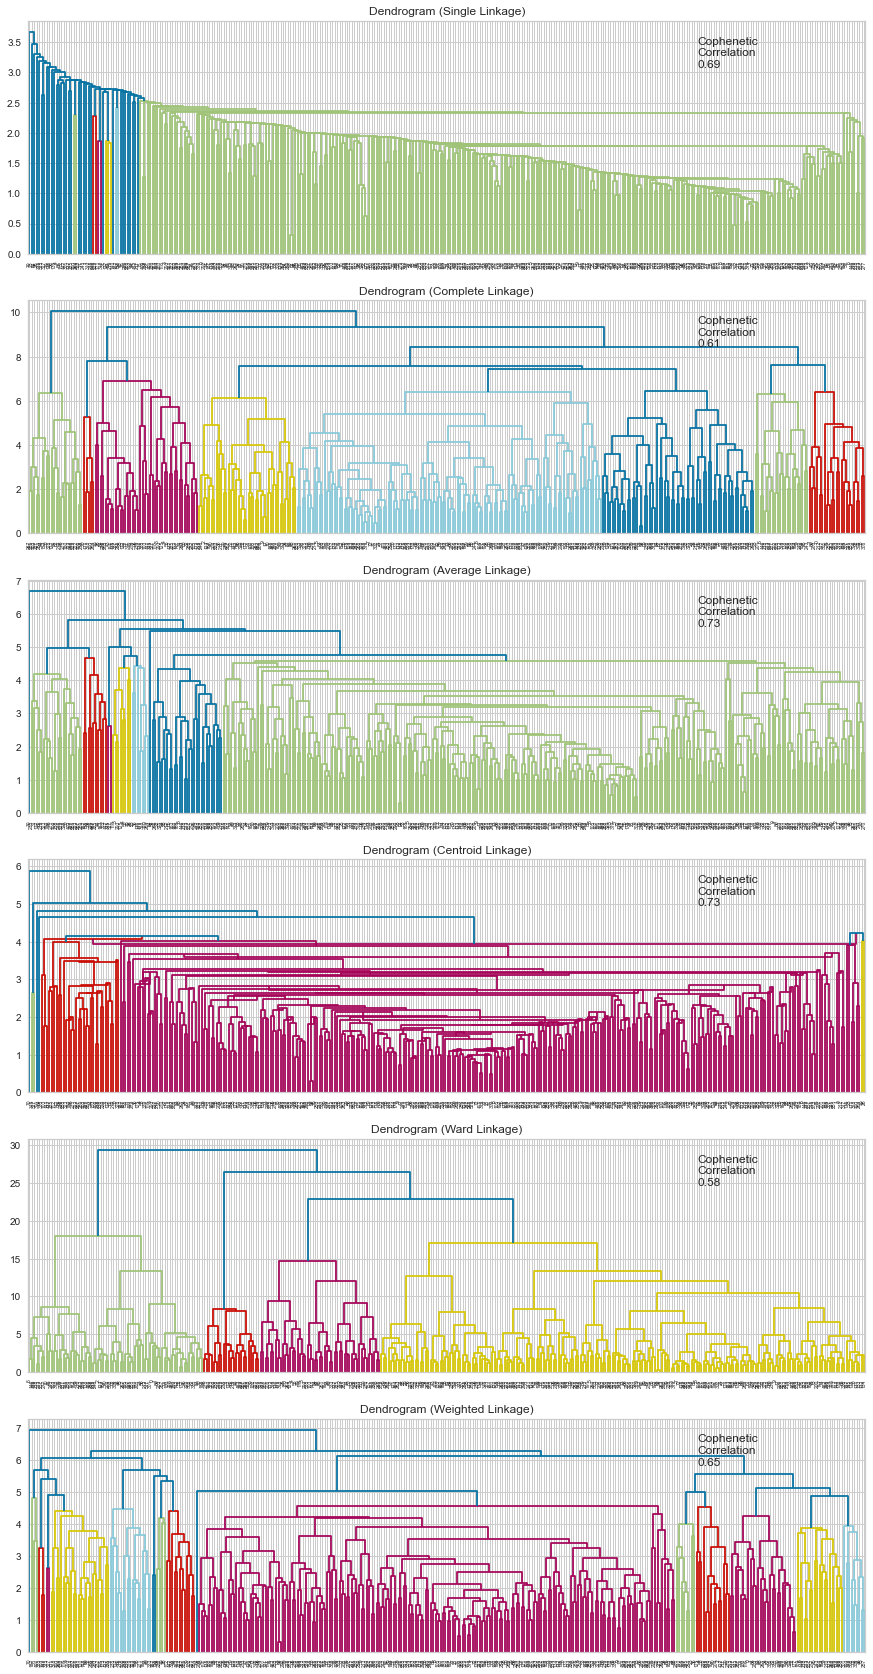

<IPython.core.display.Javascript object>

In [81]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

In [83]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=4)

<IPython.core.display.Javascript object>

In [104]:
# creating copy of df
df_hc = df.copy()

subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df_hc["HC_Clusters"] = HCmodel.labels_

<IPython.core.display.Javascript object>

In [107]:
df_hc

,Security,GICS Sector,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,HC_Clusters
0,American Airlines Group,Industrials,42.349998,9.999995,1.687151,52.875,51.0,-604000000,4219048125,9.21375,6.681299e+08,3.718174,-8.784219,0
1,AbbVie,Health Care,59.240002,8.339433,2.197887,52.875,77.0,51000000,4219048125,3.15000,1.194521e+09,18.806350,-8.750068,0
2,Abbott Laboratories,Health Care,44.910000,11.301121,1.273646,21.000,67.0,715386625,4219048125,2.94000,1.194521e+09,15.275510,-0.394171,0
3,Adobe Systems Inc,Information Technology,93.940002,13.977195,1.357679,9.000,180.0,-240840000,629551000,1.26000,4.996437e+08,56.844909,4.199651,1
4,"Analog Devices, Inc.",Information Technology,55.320000,-1.827858,1.701169,14.000,220.5,315120000,696878000,0.31000,1.194521e+09,56.844909,1.059810,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,Yahoo Inc.,Information Technology,33.259998,14.887727,1.845149,15.000,220.5,-739482375,-1967746875,-3.03625,9.394573e+08,28.976191,6.261775,0
336,Yum! Brands Inc,Consumer Discretionary,52.516175,-8.698917,1.478877,52.875,27.0,159000000,1293000000,2.97000,4.353535e+08,17.682214,-3.838260,0
337,Zimmer Biomet Holdings,Health Care,102.589996,9.347683,1.404206,1.000,100.0,376000000,147000000,0.78000,1.884615e+08,56.844909,-16.755740,0
338,Zions Bancorp,Financials,27.299999,-1.158588,1.468176,4.000,99.0,-43623000,309471000,1.20000,2.578925e+08,22.749999,-0.063096,0


<IPython.core.display.Javascript object>

In [109]:
cluster_profile_hc = df_hc.groupby("HC_Clusters").mean()

<IPython.core.display.Javascript object>

In [110]:
cluster_profile_hc["count in each segments"] = (
    df_hc.groupby("HC_Clusters")["Current Price"].count().values
)

<IPython.core.display.Javascript object>

In [122]:
# viewing the profile
cluster_profile_hc.style.highlight_max(color="lightgreen", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count in each segments
HC_Clusters,,,,,,,,,,,,
0,70.533668,5.076480,1.370566,20.138746,55.000000,-21251421.391753,1429326175.687285,3.571903,437154378.457835,22.153305,-2.134347,291
1,124.283384,17.649246,1.702071,19.338235,191.352941,217965698.529412,922378654.411765,3.054338,426077063.146176,42.799223,7.215829,17
2,35.513226,-9.052249,2.384953,24.677419,63.596774,34989008.064516,-803106294.354839,-1.523871,472889826.396855,47.957287,2.164800,31
3,174.367503,-18.391948,2.474002,22.000000,220.500000,-171460000.000000,475602000.000000,9.213750,31085098.040000,31.362745,16.320749,1


<IPython.core.display.Javascript object>

In [121]:
# let's see the names of the countries in each cluster
for cl in df_hc["HC_Clusters"].unique():
    print(
        "The",
        df_hc[df_hc["HC_Clusters"] == cl]["Security"].nunique(),
        "Securities in cluster",
        cl,
        "are:",
    )
    print(df_hc[df_hc["HC_Clusters"] == cl]["Security"].unique())
    print("-" * 100, "\n")



The 291 Securities in cluster 0 are:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Alliance Data Systems' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Citigroup Inc.' 'Caterpillar Inc.' 'Ch

<IPython.core.display.Javascript object>

#### Observations:

 - Cluster 0:
     - This cluster shows the lowest Volatility and Price Change, meaning the earnings are more modest and consistent.
     - This cluster has the lowest P/E Ratio, which means that the cost of earnings is the lowest.
     - This cluster shows the lowest Cash Ratio and worst P/B Ratio, which could mean poor earnings per ROA.
     
 - Cluster 1:
     - Currently the highest average priced security cluster.
     - This cluster has fairly low Volatility but the P/E Ratio is high so each dollar invested earns less than other clusters, with the exception of Cluster 2.

 - Cluster 2:
     - This cluster has the worst P/E Ratio, so each dollar invested earns less.
     - This cluster has the second highest Volatility but it is still modest at 2.38.
     - This cluster has a low Cash Ratio so they don't have much cash on hand.
     
 - Cluster 3:
     - This cluster only has one Security.

# KMeans vs Hierarchical

When viewing the Hierarchical Clusters, we see less variability. This is proven by one cluster containing 291 Securities and one cluster having only one. Because of this, our KMeans Clusters seem to be the better option. While there only three clusters, they seem to capture many distince metrics amongst them and group the data well. There is also more variability with counts of 81, 216, 43 in the three clusters repectively.

# Insights

 - Securities in Cluster 0 are the safest and can likely be depended on to earn modest earnings over time.
 - Securities in Cluster 2 are the most volatile and the investor should excercise caution when investing in companies within this cluster.
 - If investing in Cluster 2 securities, the fluctuating price might be the quickest and most extreme earnings short-term but are risky.
 - While the securities in Cluster 0 seem safer, there are much less of them than in Cluster 1. Cluster 1 securities are not volatile and will produce earnings over time, likely with less cost up front than securities in Cluster 0.
 - Risk-averse investors should invest mostly in Cluster 0 and 1 stocks.